<b><font size="5">PDS Group Project - Where Should I Live? </font></b>

<font size="5">Group 10: </font>
 - Lucas Casimiro (20241796)
 - Lucas Christol (20241827)
 - Miguel Gomes (20241793)
 - Pedro Ferreira (20241735)

Public GitHub repository:
https://github.com/lucasvcasimiro-byte/Group10_PDS_Project_2526


We start by importing all necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)

pandas: 2.3.2
numpy: 2.3.3
seaborn: 0.13.2


Next, importing the dataset and correcting small details for better reading.

In [2]:
city_data = pd.read_csv('city_data.csv',sep='|',header=1)
city_data.index=city_data.index + 1
city_data.rename(columns={'Avgerage Rent Price': 'Average Rent Price'}, inplace=True)
city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
5,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


Collecting the initial information:

In [3]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 1 to 86
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Average Rent Price               86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [4]:
city_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population Density,85.0,1.115141e+03,2.542779e+03,65.00,304.000,548.00,1020.000,20983.0
Population,86.0,1.754370e+06,1.843133e+06,73895.00,528118.500,1178397.00,2315896.000,12396541.0
Working Age Population,85.0,1.158294e+06,1.232534e+06,46359.00,358020.000,733794.00,1534225.000,8274794.0
Youth Dependency Ratio,86.0,2.409686e+01,3.266421e+00,19.30,21.425,23.15,25.925,37.8
Unemployment Rate,85.0,6.667059e+00,4.553632e+00,1.40,3.700,5.30,8.100,23.0
GDP per Capita,85.0,5.175027e+04,2.149562e+04,10089.92,38664.000,49329.00,63083.000,146094.0
Days of very strong heat stress,86.0,4.348837e+00,1.003848e+01,0.00,0.000,1.00,3.000,59.0
Average Monthly Salary,86.0,2.434488e+03,1.188603e+03,750.00,1412.500,2400.00,3200.000,6636.0
Average Rent Price,86.0,1.070105e+03,4.989646e+02,100.00,800.000,1050.00,1250.000,3190.0
Average Cost of Living,86.0,1.808384e+03,7.279997e+02,800.00,1300.000,1665.00,2100.000,4862.0


We then create a column for only the city and one for only the country, for more clarity and easier processes.

In [5]:
city_data_copy = city_data.copy()
city_data_copy['City_Fixed'] = city_data_copy['City'].replace({'Berlin. Germany': 'Berlin, Germany',
                                                                'Lemesos;Cyprus': 'Lemesos, Cyprus', 
                                                                'Greece, Athens': 'Athens, Greece'}).str.split('\n').str[0]

#Splitting the data into a separate dataset
split_data = city_data_copy['City_Fixed'].str.split(', ', n=1, expand=True)


#Creating the new columns in the original dataset and replacing the 'City' with its fixed version (including the .str.strip() method to clean any hidden spaces left by the split)
city_data['City_Only'] = split_data[0].str.strip()
city_data['Country'] = split_data[1].str.strip()
city_data['City'] = city_data_copy['City_Fixed']

city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update,City_Only,Country
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00,Vienna,Austria
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00,Salzburg,Austria
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00,Brussels,Belgium
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00,Antwerp,Belgium
5,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00,Gent,Belgium


1. How did you handle missing values and duplicate records in the dataset?
 Justify your approach.

Handling missing values and duplicate records in the dataset.

In [6]:
# Handling duplicates 
duplicates = city_data.duplicated().sum()
print(f'{duplicates} duplicate rows found')
if duplicates > 0:
    city_data.drop_duplicates(inplace=True)

2 duplicate rows found


We identified how many duplicate rows there were, and removed them from the dataset.

In [7]:
# Handling missing values (from info())
#'Average Price Groceries' has 80 missing values out of 86, so it´s not useful
city_data.drop('Average Price Groceries', axis=1, inplace = True)

In [8]:
# Filling numerical missing values with the median/mean (deciding on skewness)
num_cols = ['Population Density', 'Working Age Population ', 'Unemployment Rate', 'GDP per Capita']
for col in num_cols:
    no_na = city_data[col].dropna()
    if no_na.empty:
        continue
    skew_val = no_na.skew()
    if abs(skew_val) > 1:
        fill_value = no_na.median()
        method = "median"
    else:
        fill_value = no_na.mean()
        method = "mean"     
    city_data[col].fillna(fill_value, inplace=True)
    print(f"Filled '{col}' using {method} (skewness={skew_val:.2})")

# Filling categorical values with 'Unknown'
city_data['Main Spoken Languages'].fillna('Unknown', inplace=True)
city_data


Filled 'Population Density' using median (skewness=6.4)
Filled 'Working Age Population ' using median (skewness=3.1)
Filled 'Unemployment Rate' using median (skewness=1.8)
Filled 'GDP per Capita' using median (skewness=1.3)


,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City_Only,Country
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15 00:00:00,Vienna,Austria
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03 00:00:00,Salzburg,Austria
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22 00:00:00,Brussels,Belgium
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09 00:00:00,Antwerp,Belgium
5,"Gent, Belgium",552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17 00:00:00,Gent,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11 00:00:00,Stockholm,Sweden
83,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10 00:00:00,Gothenburg,Sweden
84,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07 00:00:00,Malmo,Sweden
85,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08 00:00:00,Ankara,Turkiye


<b> How did you handle missing values and duplicate records in the dataset? <b>
 - Duplicates:
     - We checked for duplicates and found out there were 2 duplicate rows. We made an 'if' condition, which dropped these if they existed, which they did.
 - Missing values:
     - 'Average Price Groceries' had 80 missing values out of 86, so we dropped the whole column.
     - For the numerical columns with missing values, we filled these with the median or mean. As these were only missing 1 value, we decided to use the mean if the skewness was between -1 and 1, and median otherwise, which ended up being the case for every column.
     - For the column 'Main Spoken Languages', we filled the missing value with 'Unknown', as it is a more accurate representation that just assuming a language that could be completely wrong.



2. a) Which country appears most frequently in the dataset? How many cities are associated with it?

As we've previously created distinct columns for city and country, we can just use the country column's counts.

In [9]:
country_counts = city_data['Country'].value_counts()
print(f'The country that appears the most is {country_counts.idxmax()}, which has {country_counts.max()} cities associated with it.')

The country that appears the most is Germany, which has 10 cities associated with it.


2. b) How many cities are present in total? How many are associated with Greece?

In [10]:
city_total = city_data.shape[0]
greece_cities = city_data[city_data['Country'] == 'Greece'].shape[0]
print(f'There are {city_total} cities in total.')
print(f'There are {greece_cities} cities associated with Greece.')

There are 84 cities in total.
There are 2 cities associated with Greece.


2. c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

In [11]:
languages = city_data['Main Spoken Languages'].str.split(',').explode().str.strip()
languages_counts = languages.value_counts()
print(f'The least spoken language is {languages_counts.idxmin()}, which is only spoken in {languages_counts.min()} city/cities.')
print(f'The top 3 most spoken languages are \n{languages_counts.head(3)}')

The least spoken language is Luxembourgish, which is only spoken in 1 city/cities.
The top 3 most spoken languages are 
Main Spoken Languages
English    46
German     14
Turkish    10
Name: count, dtype: int64


3. a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [12]:
city_data['Last Data Update'] = pd.to_datetime(city_data['Last Data Update'], errors = 'coerce')
num_errors = city_data['Last Data Update'].isna().sum()
print(f"Number of invalid or missing date entries: {num_errors}")
cutoff_date = pd.Timestamp('2023-04-01')
cities_need_update = city_data[city_data['Last Data Update'] < cutoff_date]
print("\nCities that need to be updated (data older than April 2023):")
print(cities_need_update[['City_Only', 'Country', 'Last Data Update']])




Number of invalid or missing date entries: 0

Cities that need to be updated (data older than April 2023):
            City_Only      Country Last Data Update
11              Basel  Switzerland       2023-01-19
19             Munich      Germany       2023-03-16
21  Frankfurt am Main      Germany       2023-02-04
39               Lyon       France       2023-03-31
60             Venice        Italy       2023-03-23
83         Gothenburg       Sweden       2023-03-10


3. b) How many days ago was the last update? On what day, month, and year did
            it occur?

In [13]:
last_update_date = city_data['Last Data Update'].max()
today = pd.Timestamp.today()
days_since_update = (today - last_update_date).days
print(f"The most recent data update was on {last_update_date:%d %B %Y}.")
print(f"That was {days_since_update} days ago.")


The most recent data update was on 12 December 2024.
That was 333 days ago.


4. a) How are the Unemployment Rate and GDP per Capita distributed and
            related? What does this relationship suggest? 
            Provide a visual representation

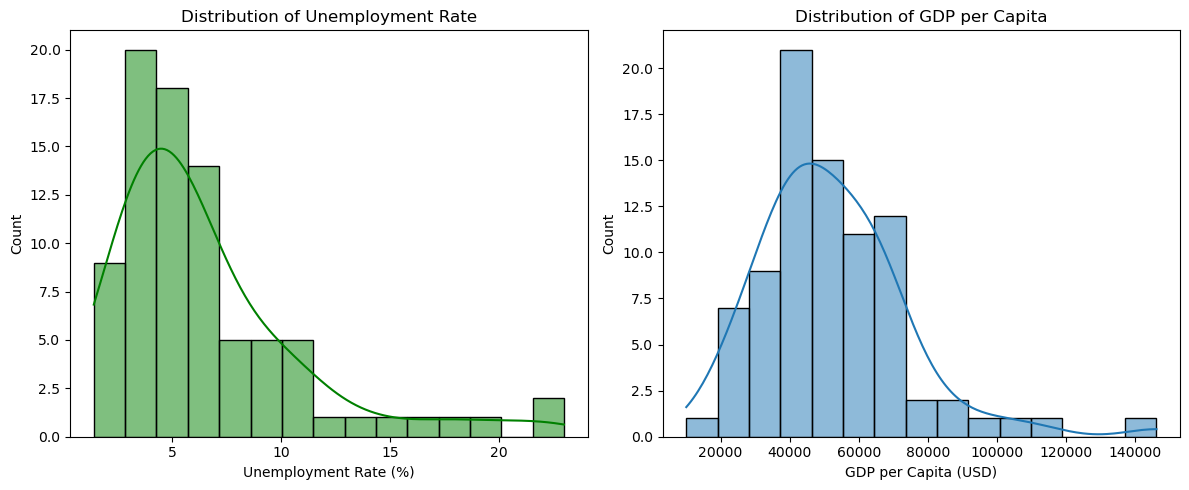

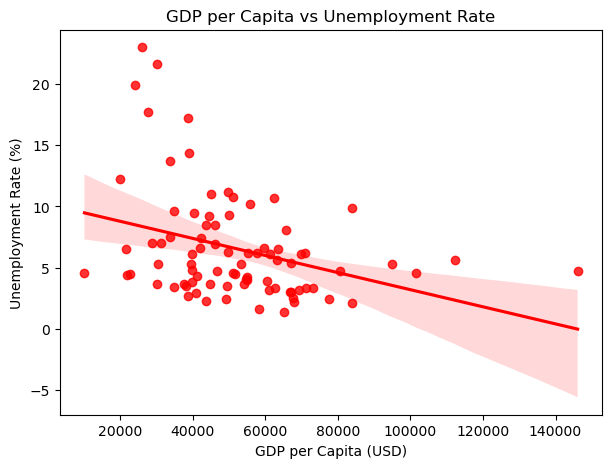

Correlation between GDP per Capita and Unemployment Rate: -0.34


In [17]:
#nao sei se é destribuição por paises e cidades mas fiz desta forma, falta o texto paneleiro de descrever a relacao das variaveis e tal
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data = city_data, x = 'Unemployment Rate', bins=15, kde=True,  color = 'green')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')

plt.subplot(1,2,2)
sns.histplot(data = city_data, x = 'GDP per Capita', bins=15, kde=True)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita (USD)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))

sns.regplot(data = city_data, x ='GDP per Capita', y = 'Unemployment Rate', scatter=True, color = 'red')
plt.title('GDP per Capita vs Unemployment Rate')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

correlation = city_data['GDP per Capita'].corr(city_data['Unemployment Rate'])
print(f"Correlation between GDP per Capita and Unemployment Rate: {correlation:.2f}")



4. b) Which are the top 5 cities with the largest difference between the Average
            Monthly Salary and Average Cost of Living? 
            What about the top 5 countries with the smallest average difference? 
            Show these results with meaningful visualizations

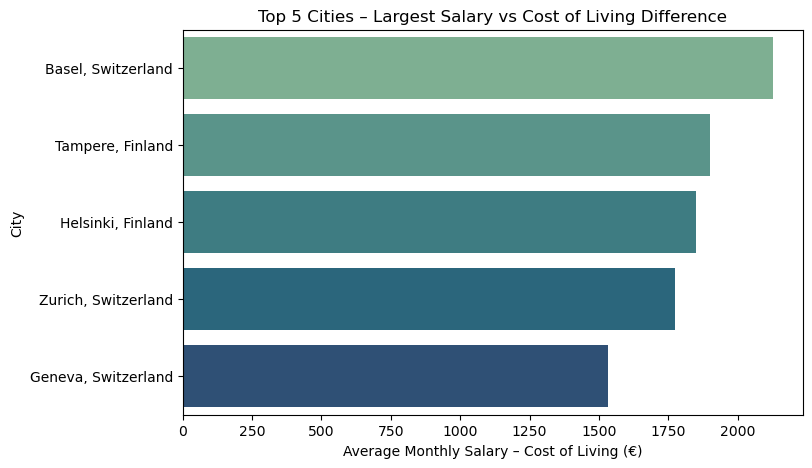

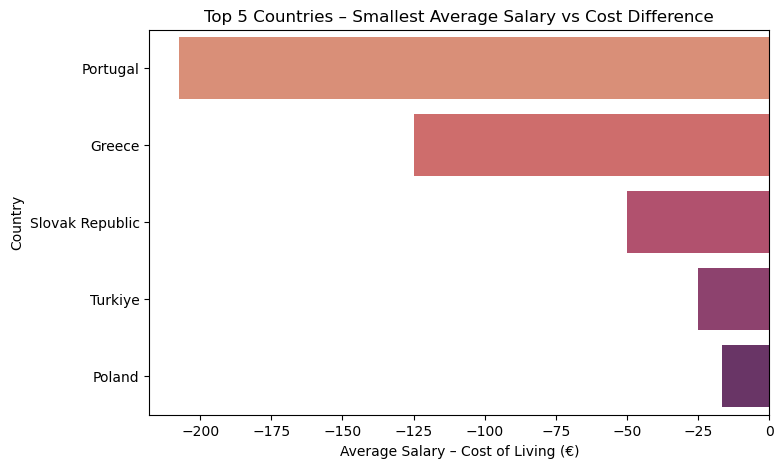

In [15]:
city_data_copy2 = city_data.copy()
city_data_copy2['Salary-Living Diff'] = city_data['Average Monthly Salary'] - city_data['Average Cost of Living']
top5_cities = city_data_copy2.nlargest(5, 'Salary-Living Diff')
avg_country_diff = city_data_copy2.groupby('Country')['Salary-Living Diff'].mean().nsmallest(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_cities, x='Salary-Living Diff', y='City', palette='crest')
plt.title('Top 5 Cities – Largest Salary vs Cost of Living Difference')
plt.xlabel('Average Monthly Salary – Cost of Living (€)')
plt.ylabel('City')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_country_diff.values, y=avg_country_diff.index, palette='flare')
plt.title('Top 5 Countries – Smallest Average Salary vs Cost Difference')
plt.xlabel('Average Salary – Cost of Living (€)')
plt.ylabel('Country')
plt.show()





In [16]:
city_data

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City_Only,Country
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,Vienna,Austria
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,Salzburg,Austria
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,Brussels,Belgium
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,Antwerp,Belgium
5,"Gent, Belgium",552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,Gent,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11,Stockholm,Sweden
83,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10,Gothenburg,Sweden
84,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07,Malmo,Sweden
85,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08,Ankara,Turkiye
